In [39]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from scipy.fftpack import dct,idct
from skimage.color import rgb2gray

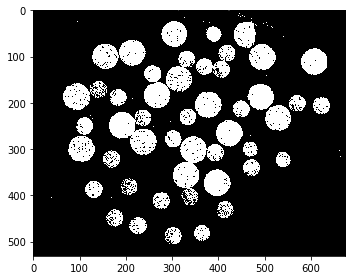

In [66]:
# image1=io.imread('bubbles.tif').astype(int)  #it is a boolean image
# image1= 255*image1

# image1= io.imread ('squares.tif')


image1= io.imread ('wood_disk.tif')  #it is gray, so we need to turn to binary
for r in range (0,image1.shape[0]):
    for c in range (0,image1.shape[1]):
        if image1[r][c]>= 155:
            image1[r][c]=255
        else:
            image1[r][c]=0

io.imshow (image1)
sh=image1.shape
row = sh[0]
col = sh[1]

In [67]:
im_erosion = image1.copy()
sz = 11 #size of structuring element
se = 255*(np.ones([sz,sz]))
cent = int((sz-1)/2)

In [68]:
#erosion
for r in range (cent,row-cent):
    for c in range (cent,col-cent):
        temp = image1[r-cent:r+cent+1,c-cent:c+cent+1]
        if np.array_equal(temp,se):
            im_erosion [r][c]=255
        else:
            im_erosion[r][c] = 0
            


In [69]:
im_dilation = im_erosion.copy()
for r in range (cent,row-cent):
    for c in range (cent,col-cent):
        temp = im_erosion[r-cent:r+cent+1,c-cent:c+cent+1]
        if np.isin(255,temp):
            im_dilation [r][c]=255
        else:
            im_dilation[r][c] = 0
            


Text(0.5, 1, 'Dilated Image')

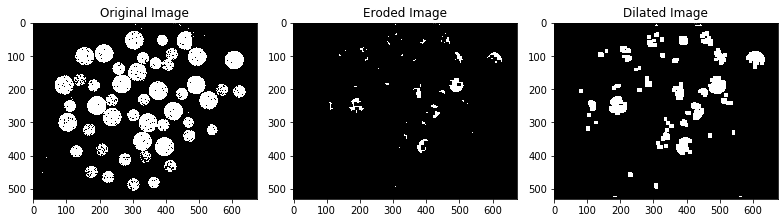

In [70]:
plt.figure (figsize=(11,11))

plt.subplot (1,3,1)
io.imshow (image1,cmap="gray")
plt.title ("Original Image")

plt.subplot (1,3,2)
io.imshow (im_erosion,cmap="gray")
plt.title ("Eroded Image")

plt.subplot (1,3,3)
io.imshow (im_dilation,cmap="gray")
plt.title ("Dilated Image")

CONCLUSIONs
1. Before applying morphological operations, image should be converted to a binary image.
2. Erosion causes objects to redduce in size by half the size of structuring element in both rows and columns. 
3. If eroded image is dilated, then the eroded objects regain their sizes. 
4. If an object is to be removed, the size of structuring element should be greater than the object.
5. For the squares image, size of structuring element was chosen to select the larger sqquares.